<a href="https://colab.research.google.com/github/wlcosta/es235_pdi/blob/master/17_haar/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 17 - Detecção de Faces usando Classificadores Haar **(parte 1)**

Começamos importando as bibliotecas necessárias:

In [3]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/mila.jpg

--2021-06-30 20:48:11--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/mila.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19477 (19K) [image/jpeg]
Saving to: ‘mila.jpg’

mila.jpg            100%[===================>]  19.02K  --.-KB/s    in 0.001s  

2021-06-30 20:48:11 (14.0 MB/s) - ‘mila.jpg’ saved [19477/19477]



Vamos estudar os básicos da detecção de faces usando os classificadores Haar. Usaremos o mesmo conhecimento para detectar os olhos das pessoas, mas o pipeline pode ser seguido para qualquer base do Haar!

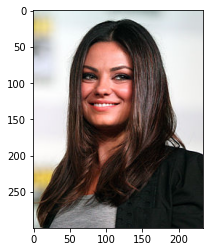

In [4]:
img = plt.imread('mila.jpg')
plt.imshow(img)

Os classificadores são salvos em um formato XML. Vamos carregá-los:

In [5]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/pt1/class/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/pt1/class/haarcascade_eye.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

--2021-06-30 20:49:12--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/pt1/class/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.09s   

2021-06-30 20:49:13 (10.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2021-06-30 20:49:13--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/pt1/class/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108

Agora, vamos converter a imagem para tons de cinza:

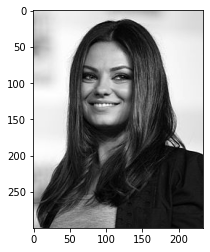

In [6]:
cinza = None
plt.imshow(cinza, cmap="gray")

Com o classificador carregado, podemos usar o método **detectMultiScale** de *face_cascade*, que definimos antes, para detectar qualquer coisa que o classificador foi treinado.

Complete o código abaixo, chamando o método `face_cascade.detectMultiScale` com os seguintes argumentos:

1. A imagem em tons de cinza
2. O fator de escala `scaleFactor=1.3` que configura a escala de redução da imagem a cada escalamento
3. O parâmetro `minNeighbors=5` que especifica quantos retângulos cada candidato precisa reter.

In [7]:
faces = None

Vamos usar a função `len()` para contar quantos rostos nós conseguimos detectar na imagem.

A saída do método é uma matriz de tamanho `(n, 4)` onde `n` é o número de faces detectadas, com 4 informações pra cada face: posição x e y do centro do retângulo, largura e altura do retângulo.

Vamos usar essas informações para desenhar um quadrado ao redor do rosto na imagem. Isso se chama bounding-box.

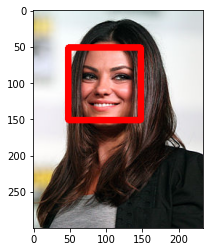

In [12]:
assert len(faces) > 0, "Nenhuma face detectada"
img_c = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    plt.imshow(img_c)

Usamos o mesmo passo-a-passo para detectar a região dos olhos, mas podemos usar um _hack_: como já sabemos onde está o rosto, vamos reduzir a área de busca definindo essa região como uma região de interesse *(region of interest, roi)*; afinal, os olhos geralmente ficam nos rostos.

Complete o código abaixo executando o método `eye_cascade.detectMultiScale` que receberá como argumento a região de interesse (rdi). Para esse exemplo, não vamos especificar nenhum outro argumento.

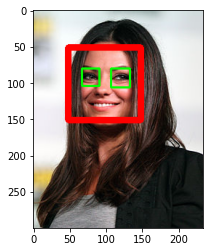

In [13]:
img_c = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    
    # rdi: região de interesse
    rdi = cinza[y:y+h, x:x+w]
    rdi_cor = img_c[y:y+h, x:x+w]
    olhos = None
    for (ox,oy,ow,oh) in olhos:
        cv2.rectangle(rdi_cor,(ox,oy),(ox+ow,oy+oh),(0,255,0),2)
plt.imshow(img_c)

Vamos continuar com uma outra imagem. Complete, novamente, carregando para tons de cinza e chamando o método `face_cascade.detectMultiScale` com os mesmos argumentos de antes.

--2021-06-30 21:01:53--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/stark.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39011 (38K) [image/jpeg]
Saving to: ‘stark.jpg’

stark.jpg           100%[===================>]  38.10K  --.-KB/s    in 0.004s  

2021-06-30 21:01:54 (9.80 MB/s) - ‘stark.jpg’ saved [39011/39011]



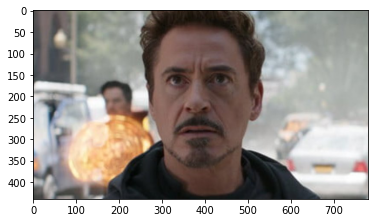

In [15]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/stark.jpg
img = plt.imread('stark.jpg')
plt.imshow(img)

In [16]:
cinza = None
faces = None

(<matplotlib.axes._subplots.AxesSubplot at 0x7fad87acf5d0>,
 Text(0.5, 1.0, 'Olhos detectados: 4'))

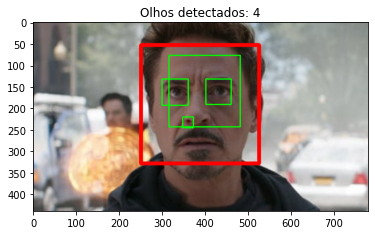

In [22]:
img_c = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    
    # rdi: região de interesse
    rdi = cinza[y:y+h, x:x+w]
    rdi_cor = img_c[y:y+h, x:x+w]
    olhos = None # novamente, use rdi
    for (ox,oy,ow,oh) in olhos:
        cv2.rectangle(rdi_cor,(ox,oy),(ox+ow,oy+oh),(0,255,0),2)
plt.subplot(111),plt.imshow(img_c),plt.title('Olhos detectados: %d' % len(olhos))

No exemplo anterior, o classificador encontrou 4 olhos no rosto do ator principal. Os parâmetros padrões do classificador não são suficientes para essa imagem, aparentemente.

Modifique o código do classificador de olhos usando os parâmetros `scaleFactor=1.3` e `minNeighbors=5`.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fad87955390>,
 Text(0.5, 1.0, 'Olhos detectados: 2'))

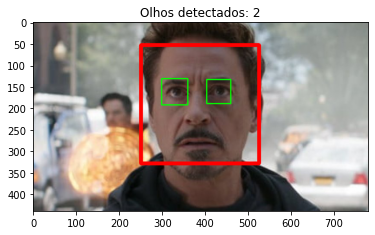

In [24]:
img_c = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    
    # rdi: região de interesse
    rdi = cinza[y:y+h, x:x+w]
    rdi_cor = img_c[y:y+h, x:x+w]
    olhos = None # novamente, use rdi
    for (ox,oy,ow,oh) in olhos:
        cv2.rectangle(rdi_cor,(ox,oy),(ox+ow,oy+oh),(0,255,0),2)
plt.subplot(111),plt.imshow(img_c),plt.title('Olhos detectados: %d' % len(olhos))

Resolvido!

### Criando o seu classificador

# Atenção

As células abaixo não são compatíveis com o Google Colab devido à necessidade de executar binários do Windows para criar o dataset. Também é possível seguir esses passos em sistemas GNU/Linux e MacOS, mas com as versões específicas do OpenCV instaladas nativamente na máquina (não apenas a versão em Python).

Se você desejar seguir, será necessário baixar o notebook e executá-lo com o `jupyter`.


---



Criar um classificador não é difícil, mas é necessário ter muitas imagens.
O OpenCV disponibiliza várias ferramentas para isso, mas é necessário executá-las separadamente. Conseguiremos realizar essas chamadas por aqui, mas não é bem suportado.

Em caso de problemas, basta seguir o tutorial fora do notebook.

Para agilizar, as imagens negativas e as anotações estão disponibilizadas junto com o repositório. 
Essas imagens já são tratadas e não possuem nenhuma imagem fora da categoria correta. Essas são as **imagens negativas**.

Vamos extraí-las:

In [25]:
import zipfile
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/neg.zip

zipfilePath = ("./neg.zip")
zip = zipfile.ZipFile(zipfilePath)
zip.extractall(".")
zip.close()

--2021-06-30 21:09:46--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/neg.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13837960 (13M) [application/zip]
Saving to: ‘neg.zip’

neg.zip             100%[===================>]  13.20M  25.2MB/s    in 0.5s    

2021-06-30 21:09:47 (25.2 MB/s) - ‘neg.zip’ saved [13837960/13837960]



Iremos gerar nossas imagens positivas a partir das imagens negativas. Por não termos um conjunto de imagens positivas anotadas, esse caminho é o caminho mais simples.

Isso é muito comum para detectar e rastrear marcas em uma cena, por exemplo.

A imagem que iremos localizar na cena é a abaixo:

--2021-06-30 21:10:15--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/aerocool.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13537 (13K) [image/jpeg]
Saving to: ‘aerocool.jpg’

aerocool.jpg        100%[===================>]  13.22K  --.-KB/s    in 0s      

2021-06-30 21:10:15 (30.3 MB/s) - ‘aerocool.jpg’ saved [13537/13537]



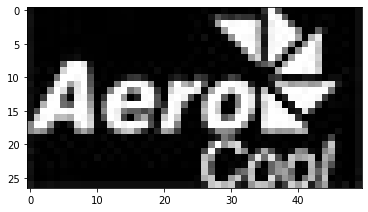

In [27]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/aerocool.jpg
aero = plt.imread('aerocool.jpg')
plt.imshow(aero)

Vamos criar um diretório para armazenar as imagens positivas:

In [ ]:
import os
if not os.path.exists('info'):
    os.mkdir('info')

Iremos executar o binário **opencv_createsamples.exe**. Este binário recebe uma imagem positiva (aerocool.jpg) e aplica essa imagem nas imagens negativas, gerando assim, imagens positivas.

In [ ]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/opencv_bin_pack.zip
zipfilePath = ("./opencv_bin_pack.zip")
zip = zipfile.ZipFile(zipfilePath)
zip.extractall(".")
zip.close()

In [ ]:
from subprocess import check_output
check_output("opencv_createsamples.exe -img aerocool.jpg -bg bg.txt -info info/info.lst -pngoutput info -maxxangle 0.5 -maxyangle 0.5 -maxzangle 0.5 -num 1950", shell=True)

b'Info file name: info/info.lst\r\nImg file name: aerocool.jpg\r\nVec file name: (NULL)\r\nBG  file name: bg.txt\r\nNum: 1950\r\nBG color: 0\r\nBG threshold: 80\r\nInvert: FALSE\r\nMax intensity deviation: 40\r\nMax x angle: 0.5\r\nMax y angle: 0.5\r\nMax z angle: 0.5\r\nShow samples: FALSE\r\nWidth: 24\r\nHeight: 24\r\nMax Scale: -1\r\nRNG Seed: 12345\r\nCreate test samples from single image applying distortions...\r\nOpen background image: neg/1343.jpg\r\nOpen background image: neg/1106.jpg\r\nOpen background image: neg/812.jpg\r\nOpen background image: neg/325.jpg\r\nOpen background image: neg/770.jpg\r\nOpen background image: neg/204.jpg\r\nOpen background image: neg/1709.jpg\r\nOpen background image: neg/556.jpg\r\nOpen background image: neg/2067.jpg\r\nOpen background image: neg/1750.jpg\r\nOpen background image: neg/21.jpg\r\nOpen background image: neg/1480.jpg\r\nOpen background image: neg/2350.jpg\r\nOpen background image: neg/1930.jpg\r\nOpen background image: neg/1247.jpg\r\

Podemos ver abaixo como as imagens são salvas:

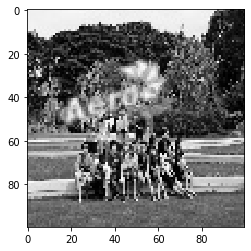

In [ ]:
plt.imshow(plt.imread('info/0001_0010_0010_0060_0060.jpg'), cmap="gray")

Como já temos as nossas imagens positivas, vamos gerar nosso dataset. Os passos anteriores poderiam ter sido substituídos por várias imagens de uma mesma classe, como por exemplo, fotos de qualquer objeto.

Vamos executar novamente o comando anterior, agora passando o diretório das imagens positivas:

In [ ]:
check_output("opencv_createsamples.exe -info info/info.lst -num 1950 -w 20 -h 20 -vec positives.vec", shell=True)

b'Info file name: info/info.lst\r\nImg file name: (NULL)\r\nVec file name: positives.vec\r\nBG  file name: (NULL)\r\nNum: 1950\r\nBG color: 0\r\nBG threshold: 80\r\nInvert: FALSE\r\nMax intensity deviation: 40\r\nMax x angle: 1.1\r\nMax y angle: 1.1\r\nMax z angle: 0.5\r\nShow samples: FALSE\r\nWidth: 20\r\nHeight: 20\r\nMax Scale: -1\r\nRNG Seed: 12345\r\nCreate training samples from images collection...\r\nDone. Created 1950 samples\r\n'

Agora podemos, finalmente, realizar o treinamento. Em um Core i7 esse treinamento dura na faixa dos 6 minutos. Se você quiser fazê-lo, basta executar a célula abaixo.

O classificador está junto com o repositório, então esse passo é opcional.

In [ ]:
if not os.path.exists('data'):
    os.mkdir('data')

check_output(".\opencv_traincascade.exe -data data -vec positives.vec -bg bg.txt -numPos 1800 -numNeg 900 -numStages 10 -w 20 -h 20", shell=True)

b'PARAMETERS:\r\ncascadeDirName: data\r\nvecFileName: positives.vec\r\nbgFileName: bg.txt\r\nnumPos: 1800\r\nnumNeg: 900\r\nnumStages: 10\r\nprecalcValBufSize[Mb] : 1024\r\nprecalcIdxBufSize[Mb] : 1024\r\nacceptanceRatioBreakValue : -1\r\nstageType: BOOST\r\nfeatureType: HAAR\r\nsampleWidth: 20\r\nsampleHeight: 20\r\nboostType: GAB\r\nminHitRate: 0.995\r\nmaxFalseAlarmRate: 0.5\r\nweightTrimRate: 0.95\r\nmaxDepth: 1\r\nmaxWeakCount: 100\r\nmode: BASIC\r\nNumber of unique features given windowSize [20,20] : 78460\r\n\r\n===== TRAINING 0-stage =====\r\n<BEGIN\r\nPOS current samples: 1\rPOS current samples: 2\rPOS current samples: 3\rPOS current samples: 4\rPOS current samples: 5\rPOS current samples: 6\rPOS current samples: 7\rPOS current samples: 8\rPOS current samples: 9\rPOS current samples: 10\rPOS current samples: 11\rPOS current samples: 12\rPOS current samples: 13\rPOS current samples: 14\rPOS current samples: 15\rPOS current samples: 16\rPOS current samples: 17\rPOS current sampl

Com o classificador treinado, podemos carregá-lo e testar na nossa imagem:

In [29]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/gabinete.jpeg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/data.zip

import os

img = plt.imread('gabinete.jpeg')
cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

if not os.path.exists('data'):
    zipfilePath = ("./data.zip")
    zip = zipfile.ZipFile(zipfilePath)
    zip.extractall(".")
    zip.close()

marca = cv2.CascadeClassifier('data/cascade.xml')
marcas = marca.detectMultiScale(cinza, scaleFactor=1.3, minNeighbors=3, minSize=(60, 60))
print(len(marcas))

--2021-06-30 21:11:36--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/gabinete.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53673 (52K) [image/jpeg]
Saving to: ‘gabinete.jpeg.1’

gabinete.jpeg.1     100%[===================>]  52.42K  --.-KB/s    in 0.02s   

2021-06-30 21:11:36 (2.90 MB/s) - ‘gabinete.jpeg.1’ saved [53673/53673]

--2021-06-30 21:11:36--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19855 (19K) [appli

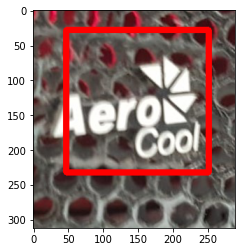

In [30]:
img_c = img.copy()
for (x,y,w,h) in marcas:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    plt.imshow(img_c)